In [4]:
# import
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
from models.vit import VisionTransformer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
import matplotlib.pyplot as plt
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
import os
from sklearn.manifold import TSNE
import seaborn as sns
import sys
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix

Using device: cpu


In [5]:
#Define Data Transforms:

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010))
])

## Download data

In [6]:
train_dataset = datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)

test_dataset = datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
batch_size = 128

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

Model

In [8]:
model = VisionTransformer(
    img_size=32,
    patch_size=4,
    in_channels=3,
    num_classes=10,
    embed_dim=256,
    num_heads=8,
    hidden_dim=512,
    num_layers=6,
    dropout=0.1
).to(device)

/Users/GuidoDeFilippo/Columbia/Data_Mining/transformer_env/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

In [10]:
num_epochs = 1
for epoch in tqdm(range(num_epochs), desc="Epochs"):
    model.train()
    for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    # Validation and logging code here

Epochs: 100%|██████████| 1/1 [06:22<00:00, 382.70s/it]


In [ ]:
from torchvision import datasets, transforms

# Define the transform (you may already have this in your code)
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add any other transforms you are using
])

# Access the class labels
class_labels = train_dataset.classes  # This is a list of class names
class_to_idx = train_dataset.class_to_idx  # This is a dictionary mapping class names to indices

print("Class Labels:")
for idx, label in enumerate(class_labels):
    print(f"{idx}: {label}")

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize if you have normalized the images
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:4]))

# Print labels
print('Labels:')
for label in labels[:4]:
    print(f"{label.item()}: {class_labels[label]}")

In [ ]:
# Assuming 'vit_model' is your Vision Transformer model instance
for name, module in relu_model.named_modules():
    print(name)


patch_embed
patch_embed.proj
pos_embed
dropout
encoder
encoder.layers
encoder.layers.0
encoder.layers.0.self_attn
encoder.layers.0.self_attn.query_proj
encoder.layers.0.self_attn.key_proj
encoder.layers.0.self_attn.value_proj
encoder.layers.0.self_attn.out_proj
encoder.layers.0.linear1
encoder.layers.0.dropout
encoder.layers.0.linear2
encoder.layers.0.norm1
encoder.layers.0.norm2
encoder.layers.0.dropout1
encoder.layers.0.dropout2
encoder.layers.0.activation
encoder.layers.1
encoder.layers.1.self_attn
encoder.layers.1.self_attn.query_proj
encoder.layers.1.self_attn.key_proj
encoder.layers.1.self_attn.value_proj
encoder.layers.1.self_attn.out_proj
encoder.layers.1.linear1
encoder.layers.1.dropout
encoder.layers.1.linear2
encoder.layers.1.norm1
encoder.layers.1.norm2
encoder.layers.1.dropout1
encoder.layers.1.dropout2
encoder.layers.1.activation
encoder.layers.2
encoder.layers.2.self_attn
encoder.layers.2.self_attn.query_proj
encoder.layers.2.self_attn.key_proj
encoder.layers.2.self_att

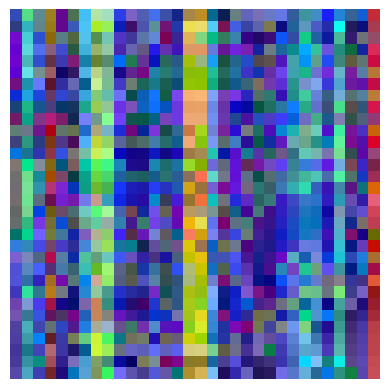

In [ ]:
from torchcam.methods import GradCAM
from torchvision.transforms.functional import to_pil_image

# Initialize GradCAM with the desired layer
cam_extractor = GradCAM(relu_model, target_layer='encoder.layers.3')

# Prepare your image
# Assuming 'image' is a PIL Image or tensor of shape [C, H, W]
image_tensor = transform_test(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

# Forward pass
outputs = relu_model(image_tensor)

# Get the predicted class index
pred_class = outputs.argmax(dim=1).item()

# Retrieve the CAM by passing the class index and model outputs
activation_map = cam_extractor(class_idx=pred_class, scores=outputs)

# The activation_map is a list of activation maps for each target layer specified.
# Since we have only one target layer, we can get the first element.
activation_map = activation_map[0]

# Convert image tensor back to PIL Image for visualization
input_image = to_pil_image(image_tensor.squeeze(0).cpu())

# Resize the activation map to match the input image size
import torch.nn.functional as F
activation_map_resized = F.interpolate(
    activation_map.unsqueeze(0).unsqueeze(0), size=(input_image.size[1], input_image.size[0]), mode='bilinear', align_corners=False
).squeeze().cpu().numpy()

# Visualize the CAM overlayed on the input image
plt.imshow(input_image)
plt.imshow(activation_map_resized, cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()